In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [8]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
df = df.drop(['petal length (cm)', 'petal width (cm)'], axis = 'columns')

In [11]:
df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [21]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['sepal length (cm)', 'sepal width (cm)']])
    sse.append(km.inertia_)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

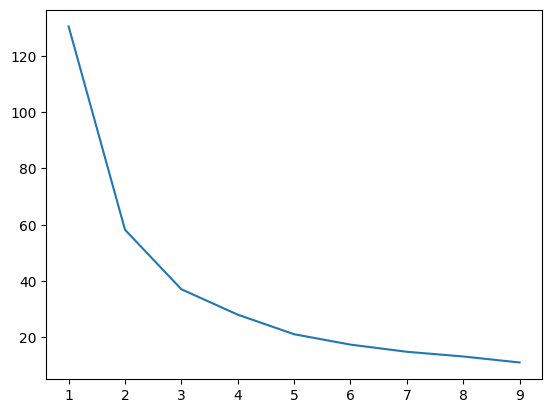

In [22]:
plt.plot(k_rng, sse)

In [26]:
km = KMeans(n_clusters = 3)

In [27]:
y_predicted = km.fit_predict(df[['sepal length (cm)', 'sepal width (cm)']])

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
df['cluster'] = y_predicted
df

,sepal length (cm),sepal width (cm),cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,2
147,6.5,3.0,1
148,6.2,3.4,1


Text(0, 0.5, 'Width')

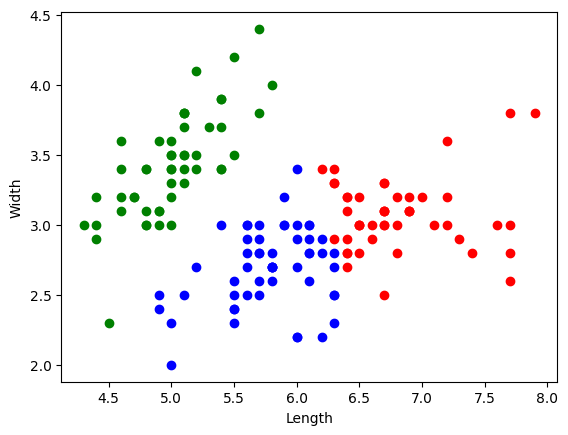

In [29]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'green')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color = 'red')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color = 'blue')

plt.xlabel('Length')
plt.ylabel('Width')